# 서울의 기온이 가장 높았던 날의 날짜와 기온 구하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./Seoul_Temp/seoul.csv', encoding = 'cp949')

df.fillna(-100, inplace=True)

max_temp = -999
max_date = ''

df.drop(['지점','평균기온(℃)','최저기온(℃)'],axis=1, inplace=True)

temp = df['최고기온(℃)'].values

for row in df.values:
    if row[1] == -100:
        row[1] = -999
    row[1] = float(row[1])
    if max_temp < row[1]:
        max_date = row[0]
        max_temp = row[1]

print(max_date, max_temp)

2018-08-01 39.6


# 내 생일의 기온 변화를 그래프로 그리기

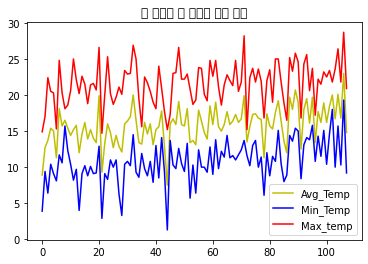

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./Seoul_Temp/seoul.csv', encoding = 'cp949')

df.drop('지점', axis=1, inplace=True)

df1 = df[df['평균기온(℃)'].isna() == True].index
df.drop(df1, inplace=True)

birth_date = []

for row in df.values:
    if row[0].split('-')[1] == '10' and row[0].split('-')[-1] == '08':
        birth_date.append(row[0])

birth = df.set_index('날짜')
birth = birth.loc[birth_date]

avg_temp = birth['평균기온(℃)'].values
min_temp = birth['최저기온(℃)'].values
max_temp = birth['최고기온(℃)'].values

x = np.arange(len(birth))

plt.plot(x, avg_temp, color='y')
plt.plot(x, min_temp, color='b')
plt.plot(x, max_temp, color='r')
plt.title('내 생일의 각 연도별 온도 변화')
plt.legend(labels=['Avg_Temp', 'Min_Temp', 'Max_temp'])
plt.rc('font', family='NanumGothic')
plt.show()

# 상자 그림 그리기 

In [12]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('./Traffic_data/subwayfee.csv', encoding='cp949')
data = csv.reader(f)
next(data)

mx_station = ''
mx = 0

for row in data:
    if int(row[4]) + int(row[6]) >= 100000:
        rate = int(row[4]) / (int(row[4])+int(row[6]))
        if rate > mx:
            mx = rate
            mx_station = row[3]

print(mx_station, round(mx,2),'%')

홍대입구 0.95 %


# 모든 역의 유무임 승하차 비율은 어떻게 될까

In [46]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('./Traffic_data/subwayfee.csv', encoding='cp949')
data = csv.reader(f)
next(data)

population = []

for row in data:
    for i in range(4,8):
        population.append(row[i])

x = np.array(population).reshape(598,4)

count =0

for a in range(598):
    x[a][0] += count



TypeError: must be str, not int

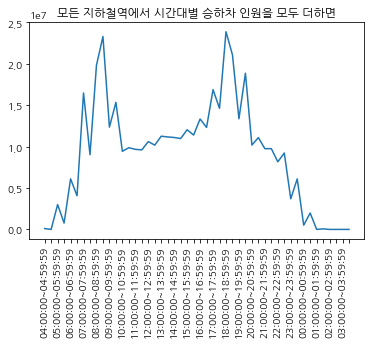

In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('./Traffic_data/subwaytime.csv', encoding='cp949')
data = csv.reader(f)

label = []

population = []
for i, row in enumerate(data):
    if i == 0:
        label = row[4:]
    elif i == 1:
        continue
    else:
        row[4:] = map(int, row[4:])
        population.append(row[4:])

pop_array = np.array(population)
sum_pop = np.sum(pop_array, axis=0)

x = np.arange(len(label))
y = np.arange(sum_pop.max())


#plt.figure(figsize=(100,50))
plt.plot(x, sum_pop)
plt.xticks(x, label, rotation=90)
plt.rc('font', family='NanumGothic')
plt.rc('font', size=10)
plt.title('모든 지하철역에서 시간대별 승하차 인원을 모두 더하면')
plt.show()


In [5]:
print(sum_pop)

[  105055     1616  3004777   769865  6109712  4063753 16485348  9027520
 19843950 23309313 12357620 15352447  9438699  9873017  9673116  9611044
 10609249 10183646 11262850 11171310 11106713 10979461 12041962 11400318
 13343105 12321795 16889514 14629199 23883151 21088185 13366319 18874835
 10190610 11095402  9754728  9759638  8167505  9230667  3701401  6107653
   512101  1981268      506    66402       22       21        1        0]


In [ ]:
105055	1616	3004777	769865	6109712	4063753	16485348	9027520	19843950	23309313	12357620	15352447	9438699	9873017	9673116	9611044	10609249	10183646	11262850	11171310	11106713	10979461	12041962	11400318	13343105	12321795	16889514	14629199	23883151	21088185	13366319	18874835	10190610	11095402	9754728	9759638	8167505	9230667	3701401	6107653	512101	1981268	506	66402	22	21	1	0
